# Word Cloud, Word Appearance Table and PCA Prep

## Here we accomplished several tasks: 1) Collecting horror movies, romance movies and scifi movies from top 10000 movie data base, analyzing the contents of the movie title and movie overview, creating the wordclouds that show the most common words in three different genres; 2) Creating a corpus from the above-mentioned movies, filter the most frequent words, using a long boolean vector to indicate each word's appearance in each movie's title or overview; 3) Conducting PCA and choosing first PCs that explain 90% of variance in the data, cleaning the data format and outputting to .csv files for further PCA and SVM study in R.

In [1]:
import pandas as pd
import string

In [2]:
### Read in Top 10000 movies ###

movies = pd.read_csv("movies.csv", index_col=0)
movies = pd.DataFrame(movies)

In [3]:
### Filter out movies with invalid information format ###

valid_genre_filter = [type(i) is str for i in movies["genre_ids"]]
movies = movies[valid_genre_filter]
valid_title_filter = [type(i) is str for i in movies["title"]]
movies = movies[valid_title_filter]

In [4]:
### Remaining number of movies ###

len(movies)

9814

In [50]:
### Collecting Romance movies and Horror movies from the data ###

Romance_movies =[]
Horror_movies = []
Scifi_movies=[]
for key, movie in movies.iterrows():
    if "10749" in movie["genre_ids"]:
        Romance_movies.append(movie)
    elif "27" in movie["genre_ids"]:
        Horror_movies.append(movie)
    elif "878" in movie["genre_ids"]:
        Scifi_movies.append(movie)

In [130]:
### Number of romance movies ###

len(Romance_movies)

500

In [127]:
### Number of horror movies ###

len(Horror_movies)

500

In [126]:
### Number of scifi movies ###

len(Scifi_movies)

500

In [131]:
Romance_movies=Romance_movies[:500]
Horror_movies = Horror_movies[:500]
Scifi_movies = Scifi_movies[:500]

In [132]:
### Combined text of overview information from horror movies ###

H_text = ""
for movie in Horror_movies:
    if isinstance(movie["overview"],str):
        H_text+=movie["overview"]

In [133]:
### Comined text of overview information from romance movies ###

R_text = ""
for movie in Romance_movies:
    if isinstance(movie["overview"],str):
        R_text+=movie["overview"]

In [134]:
### Comined text of overview information from scifi movies ###

S_text = ""
for movie in Scifi_movies:
    if isinstance(movie["overview"],str):
        S_text+=movie["overview"]

In [10]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
from PIL import Image
from os import path
import matplotlib.pyplot as plt

In [47]:
### The list of stopwords ###

stopwords = ['a', 'about', 'above', 'across', 'after', 'afterwards']
stopwords += ['again', 'against', 'all', 'almost', 'alone', 'along']
stopwords += ['already', 'also', 'although', 'always', 'am', 'among']
stopwords += ['amongst', 'amoungst', 'amount', 'an', 'and', 'another']
stopwords += ['any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere']
stopwords += ['are', 'around', 'as', 'at', 'back', 'be', 'became']
stopwords += ['because', 'become', 'becomes', 'becoming', 'been']
stopwords += ['before', 'beforehand', 'behind', 'being', 'below']
stopwords += ['beside', 'besides', 'between', 'beyond', 'bill', 'both']
stopwords += ['bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant']
stopwords += ['co', 'computer', 'con', 'could', 'couldnt', 'cry', 'de']
stopwords += ['describe', 'detail', 'did', 'do', 'done', 'down', 'due']
stopwords += ['during', 'each', 'eg', 'eight', 'either', 'eleven', 'else']
stopwords += ['elsewhere', 'empty', 'enough', 'etc', 'even', 'ever']
stopwords += ['every', 'everyone', 'everything', 'everywhere', 'except']
stopwords += ['few', 'fifteen', 'fifty', 'fill', 'find', 'fire', 'first']
stopwords += ['five', 'for', 'former', 'formerly', 'forty', 'found']
stopwords += ['four', 'from', 'front', 'full', 'further', 'get', 'give']
stopwords += ['go', 'had', 'has', 'hasnt', 'have', 'he', 'hence', 'her']
stopwords += ['here', 'hereafter', 'hereby', 'herein', 'hereupon', 'hers']
stopwords += ['herself', 'him', 'himself', 'his', 'how', 'however']
stopwords += ['hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed']
stopwords += ['interest', 'into', 'is', 'it', 'its', 'itself', 'keep']
stopwords += ['last', 'latter', 'latterly', 'least', 'less', 'ltd', 'made']
stopwords += ['many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine']
stopwords += ['more', 'moreover', 'most', 'mostly', 'move', 'much']
stopwords += ['must', 'my', 'myself', 'name', 'namely', 'neither', 'never']
stopwords += ['nevertheless', 'next', 'nine', 'no', 'nobody', 'none']
stopwords += ['noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of']
stopwords += ['off', 'often', 'on','once', 'one', 'only', 'onto', 'or']
stopwords += ['other', 'others', 'otherwise', 'our', 'ours', 'ourselves']
stopwords += ['out', 'over', 'own', 'part', 'per', 'perhaps', 'please']
stopwords += ['put', 'rather', 're', 's', 'same', 'see', 'seem', 'seemed']
stopwords += ['seeming', 'seems', 'serious', 'several', 'she', 'should']
stopwords += ['show', 'side', 'since', 'sincere', 'six', 'sixty', 'so']
stopwords += ['some', 'somehow', 'someone', 'something', 'sometime']
stopwords += ['sometimes', 'somewhere', 'still', 'such', 'system', 'take']
stopwords += ['ten', 'than', 'that', 'the', 'their', 'them', 'themselves']
stopwords += ['then', 'thence', 'there', 'thereafter', 'thereby']
stopwords += ['therefore', 'therein', 'thereupon', 'these', 'they']
stopwords += ['thick', 'thin', 'third', 'this', 'those', 'though', 'three']
stopwords += ['three', 'through', 'throughout', 'thru', 'thus', 'to']
stopwords += ['together', 'too', 'top', 'toward', 'towards', 'twelve']
stopwords += ['twenty', 'two', 'un', 'under', 'until', 'up', 'upon']
stopwords += ['us', 'very', 'via', 'was', 'we', 'well', 'were', 'what']
stopwords += ['whatever', 'when', 'whence', 'whenever', 'where']
stopwords += ['whereafter', 'whereas', 'whereby', 'wherein', 'whereupon']
stopwords += ['wherever', 'whether', 'which', 'while', 'whither', 'who']
stopwords += ['whoever', 'whole', 'whom', 'whose', 'why', 'will', 'with']
stopwords += ['within', 'without', 'would', 'yet', 'you', 'your']
stopwords += ['yours', 'yourself', 'yourselves']

stopwords_set=set(stopwords)

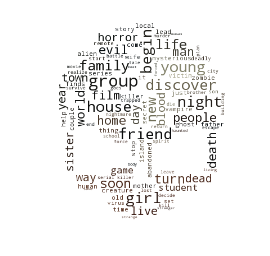

In [135]:
### Generating wordcloud from horror movies ###

skull_mask = np.array(Image.open("skull.png"))
skull_wc = WordCloud(background_color = "white", max_words=100, mask = skull_mask,
                    stopwords=stopwords, max_font_size=30 )
skull_wc.generate(H_text)

h_poster = np.array(Image.open("horror.png"))
h_color = ImageColorGenerator(h_poster)

skull_wc = skull_wc.recolor(color_func=h_color)

skull_wc.to_file("skull_wc.png")

%matplotlib inline
plt.imshow(skull_wc, interpolation="bilinear")
plt.axis("off")
plt.figure()

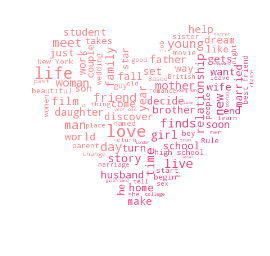

In [136]:
### Generating wordcloud from romance movies ###
heart_mask = np.array(Image.open("heart.png"))
heart_wc = WordCloud(background_color = "white", max_words=100, mask = heart_mask,
                    stopwords=stopwords,max_font_size=30)
heart_wc.generate(R_text)

r_poster= np.array(Image.open("romance.png"))
r_color = ImageColorGenerator(r_poster)

heart_wc=heart_wc.recolor(color_func=r_color)
heart_wc.to_file("heart_wc.png")

%matplotlib inline
plt.imshow(heart_wc, interpolation="bilinear")
plt.axis("off")
plt.figure()

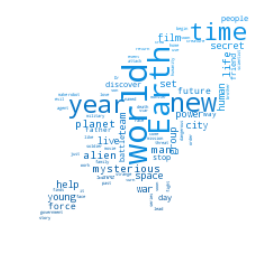

In [137]:
### Generating wordcloud from scifi movies ###
space_mask = np.array(Image.open("space.png"))
space_wc = WordCloud(background_color = "white", max_words=100, mask = space_mask,
                    stopwords=stopwords,max_font_size=30)
space_wc.generate(S_text)

s_poster= np.array(Image.open("ocean.png"))
s_color = ImageColorGenerator(s_poster)

space_wc=space_wc.recolor(color_func=s_color)
space_wc.to_file("space_wc.png")

%matplotlib inline
plt.imshow(space_wc, interpolation="bilinear")
plt.axis("off")
plt.figure()

In [138]:
### Combined information of horror, romance and scifi movies ###

Combined = Romance_movies+Horror_movies+Scifi_movies

In [139]:
### Creating the corpus ###

wordlist = []
translator = str.maketrans('', '', string.punctuation)
for movie in Combined:
    if isinstance(movie["overview"],str):
        wordstring=movie["overview"].lower()
        wordstring=wordstring.translate(translator)
        wordlist.extend(wordstring.split())
    if isinstance(movie["title"],str):
        wordstring=movie["title"].lower()
        wordstring=wordstring.translate(translator)
        wordlist.extend(wordstring.split())

In [140]:
### Length of the wordlist ###

len(wordlist)

89082

In [141]:
### Filter out stopwords in wordlist ###

wordlist = [w for w in wordlist if w not in stopwords]

In [142]:
### Remaining number of words in wordlist ###

len(wordlist)

48405

In [143]:
### Creating a word dictionary with word frequency ###

worddict = {}
for i in wordlist:
    if i not in worddict:
        worddict[i]=1
    else:
        worddict[i]+=1
        
wordfreq = [(worddict[key], key) for key in worddict]

In [144]:
### Only keep the words with frequency more than 30 times ###

wordfreq = [(freq,word) for (freq,word) in wordfreq if freq>30]

In [145]:
### Number of unique words ###

len(wordfreq)

179

In [146]:
### How does this word_freq list look like ###

wordfreq.sort()
wordfreq.reverse()
wordfreq[:20]

[(242, 'life'),
 (231, 'young'),
 (219, 'new'),
 (219, 'love'),
 (200, 'world'),
 (187, 'man'),
 (154, 'time'),
 (135, 'group'),
 (133, 'earth'),
 (132, 'years'),
 (128, 'film'),
 (122, 'woman'),
 (122, 'story'),
 (120, 'family'),
 (117, 'friends'),
 (116, 'day'),
 (114, 'finds'),
 (107, 'home'),
 (103, 'school'),
 (101, 'mysterious')]

In [147]:
### The unique word list ###

overview_dictionary = set()
for (freq,word) in wordfreq:
    overview_dictionary.add(word)

In [148]:
### Creating a dataframe with the word frequency as a vector ###

movie_word_freq = {}
for movie in Combined:
    info ={}
    freq=[]
    for word in overview_dictionary:
        if type(movie["overview"]) is str and word in movie["overview"]:
            freq.append(1)
        else:
            freq.append(0)
    if sum(freq)>12:
        info["freq"]=freq
        if "27" in movie["genre_ids"]:
            info["genre"]="Horror"
        elif "10749" in movie["genre_ids"]:
            info["genre"]="Romance"
        elif "878" in movie["genre_ids"]:
            info["genre"]="Scifi"
        info["title"]=movie["title"]
        movie_word_freq[movie["title"]]=info
        
df = pd.DataFrame.transpose(pd.DataFrame(movie_word_freq))
df.index=range(len(df))

In [149]:
np.shape(df)

(370, 3)

In [150]:
### How's it look like ###

df.iloc[:20]

,freq,genre,title
0,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Romance,(500) Days of Summer
1,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Scifi,1
2,"[1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",Horror,13 Hours in a Warehouse
3,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Romance,2 Days in Paris
4,"[1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Scifi,2047: Sights of Death
5,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Horror,28 Weeks Later
6,"[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, ...",Romance,3 Idiots
7,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",Horror,4bia
8,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",Scifi,A Chinese Ghost Story
9,"[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Romance,A Hare over the Abyss


In [151]:
### Transform the dataframe to have each word as a single feature ###

vector = pd.DataFrame(df["freq"].tolist())
df = pd.concat([df,vector], axis=1)
del df["freq"]

In [152]:
### How's this dataframe look like now ###

df.iloc[:20]

,genre,title,0,1,2,3,4,5,6,7,...,169,170,171,172,173,174,175,176,177,178
0,Romance,(500) Days of Summer,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Scifi,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,Horror,13 Hours in a Warehouse,1,0,0,0,1,1,0,0,...,0,0,0,0,1,1,1,1,0,1
3,Romance,2 Days in Paris,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,Scifi,2047: Sights of Death,1,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,Horror,28 Weeks Later,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,Romance,3 Idiots,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7,Horror,4bia,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
8,Scifi,A Chinese Ghost Story,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9,Romance,A Hare over the Abyss,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [153]:
### Number of horror movies after word-freq filtering ###

sum(df["genre"]=="Horror")

119

In [154]:
### Number of romance movies after word-freq filtering ###

sum(df["genre"]=="Romance")

122

In [155]:
### Number of scifi movies after word-freq filtering ###

sum(df["genre"]=="Scifi")

129

In [156]:
### Separating the feature matrix for PCA ###
feature = df.ix[:,2:2+len(wordfreq)]
feature.iloc[:20]

,0,1,2,3,4,5,6,7,8,9,...,169,170,171,172,173,174,175,176,177,178
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,1,1,1,0,1
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,1,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [32]:
from sklearn.decomposition import PCA

In [157]:
### Initial step in PCA ###

pca=PCA(n_components=len(feature.columns))
pca.fit(feature)

PCA(copy=True, n_components=179, whiten=False)

In [161]:
### First 100 PCs explain above 90% of variance in data ###

sum(pca.explained_variance_ratio_[:100])

0.90142460323235485

In [160]:
### Output .csv files for further analysis in R ###

feature.to_csv("feature.csv")
genre = df["genre"]
genre.to_csv("genre.csv")
title = df["title"]
title.to_csv("title.csv")